In [1]:
import ale_py
import gymnasium as gym
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

env = gym.make("ALE/Skiing-v5", render_mode="human")

# Initialize variables for recording
gameplay_data = {
    "observations": [],
    "actions": [],
    "rewards": [],
}


# Map keys to actions
action_map = {
    "5": 0,  # NOOP
    "6": 1,  # RIGHT 
    "4": 2,  # LEFT
}


print("Controls: ")
print("0: NOOP, 1: RIGHT, 2: LEFT")
print("Press 'q' to quit the game.")

try:
    obs, info = env.reset()
    done = False
    total_reward = 0

    while not done:

        # Render observation in console (optional: display numerical details)
        print(f"Observation shape: {obs.shape}")
        
        # Request action from user
        action = input("Enter action (0-2): ").strip()
        if action == "q":
            print("Game terminated by user.")
            break
        
        # Validate input
        if action not in action_map:
            print("Invalid action! Please enter a valid action (0-2).")
            continue
        
        action = action_map[action]
        
        # Take step in the environment
        next_obs, reward, terminated, truncated, info = env.step(action)
        
        # Record gameplay data
        gameplay_data["observations"].append(obs)
        gameplay_data["actions"].append(action)
        gameplay_data["rewards"].append(reward)

        # Update current state
        obs = next_obs
        total_reward += reward

        # Check if game ended
        done = terminated or truncated

    print(f"Game finished with total reward: {total_reward}")

finally:
    # Close environment
    env.close()

    # Save gameplay data to a file
    save_path = "skiing_gameplay_data.pkl"
    with open(save_path, "wb") as f:
        pickle.dump(gameplay_data, f)

    print(f"Gameplay data saved to {os.path.abspath(save_path)}.")


Controls: 
0: NOOP, 1: RIGHT, 2: LEFT
Press 'q' to quit the game.
Observation shape: (210, 160, 3)
Observation shape: (210, 160, 3)
Invalid action! Please enter a valid action (0-2).
Observation shape: (210, 160, 3)
Observation shape: (210, 160, 3)
Observation shape: (210, 160, 3)
Observation shape: (210, 160, 3)
Observation shape: (210, 160, 3)
Invalid action! Please enter a valid action (0-2).
Observation shape: (210, 160, 3)
Observation shape: (210, 160, 3)
Observation shape: (210, 160, 3)
Observation shape: (210, 160, 3)
Invalid action! Please enter a valid action (0-2).
Observation shape: (210, 160, 3)
Observation shape: (210, 160, 3)
Observation shape: (210, 160, 3)
Observation shape: (210, 160, 3)
Invalid action! Please enter a valid action (0-2).
Observation shape: (210, 160, 3)
Observation shape: (210, 160, 3)
Observation shape: (210, 160, 3)
Observation shape: (210, 160, 3)
Observation shape: (210, 160, 3)
Observation shape: (210, 160, 3)
Observation shape: (210, 160, 3)
Obse

In [2]:
# Path to the saved gameplay data
data_file = "skiing_gameplay_data.pkl"

# Load the data
with open(data_file, "rb") as f:
    gameplay_data = pickle.load(f)

observations = gameplay_data["observations"]

from PIL import Image
# Convert observations to PIL images and store them in a list
frames = [Image.fromarray(obs) for obs in observations]

# Define the path for saving the GIF
gif_path = "skiing_observations.gif"

# Save the frames as a GIF
frames[0].save(
    gif_path,
    save_all=True,
    append_images=frames[1:],
    duration=50,  # Duration of each frame (milliseconds)
    loop=0,  # 0 means infinite loop
)

In [4]:
def episode_anlysis(data_file, num):
    print(f"EPISODE {num}")
    with open(data_file, "rb") as f:
        gameplay_data = pickle.load(f)
    observations = gameplay_data["observations"]
    actions = gameplay_data["actions"]
    rewards = gameplay_data["rewards"]

    observations = np.array(observations)
    actions = np.array(actions)
    rewards = np.array(rewards)

    if len(observations) == len(actions) and len(actions) == len(rewards):
        print((f"Loaded {len(observations)} observations, actions and rewards."))

    print(f"Episode Reward: {rewards[0:-1].sum()}")
    print(f"Penalization: {rewards[-1]}")
    print(f"Total Reward: {rewards.sum()}")
    episodes_rewards.append(rewards[0:-1].sum())
    penalties.append(rewards[-1])
    num_actions.append(-(len(actions)))
    print()

num_actions = []
episodes_rewards = []
penalties = []

episode_anlysis('episode_1.pkl', 1)
episode_anlysis('episode_2.pkl', 2)
episode_anlysis('episode_3.pkl', 3)
episode_anlysis('episode_4.pkl', 4)
episode_anlysis('episode_5.pkl', 5)
episode_anlysis('episode_6.pkl', 6)
episode_anlysis('episode_7.pkl', 7)
episode_anlysis('episode_8.pkl', 8)
episode_anlysis('episode_9.pkl', 9)
episode_anlysis('episode_10.pkl', 10)
episode_anlysis('episode_11.pkl', 11)





EPISODE 1
Loaded 529 observations, actions and rewards.
Episode Reward: -3515.0
Penalization: -5.0
Total Reward: -3520.0

EPISODE 2
Loaded 535 observations, actions and rewards.
Episode Reward: -3554.0
Penalization: -2.0
Total Reward: -3556.0

EPISODE 3
Loaded 545 observations, actions and rewards.
Episode Reward: -3621.0
Penalization: -2.0
Total Reward: -3623.0

EPISODE 4
Loaded 526 observations, actions and rewards.
Episode Reward: -3495.0
Penalization: -500.0
Total Reward: -3995.0

EPISODE 5
Loaded 590 observations, actions and rewards.
Episode Reward: -3921.0
Penalization: -1005.0
Total Reward: -4926.0

EPISODE 6
Loaded 579 observations, actions and rewards.
Episode Reward: -3847.0
Penalization: 0.0
Total Reward: -3847.0

EPISODE 7
Loaded 587 observations, actions and rewards.
Episode Reward: -3901.0
Penalization: -1.0
Total Reward: -3902.0

EPISODE 8
Loaded 526 observations, actions and rewards.
Episode Reward: -3495.0
Penalization: 0.0
Total Reward: -3495.0

EPISODE 9
Loaded 662 

- Episode 1-2-3: all gates
- Episode 4: missed 1 gate. 
- Episode 5: missed 2 gates, collided with 1. 
- Episode 6: collided with 1 gate. 
- 
- episode 8:all gates. no collisions
- episode 9: collided with 1 gate. missed 1
- epsiode 10: all gates. collided with 1 gate
-episode 11: missed 1 gate. 


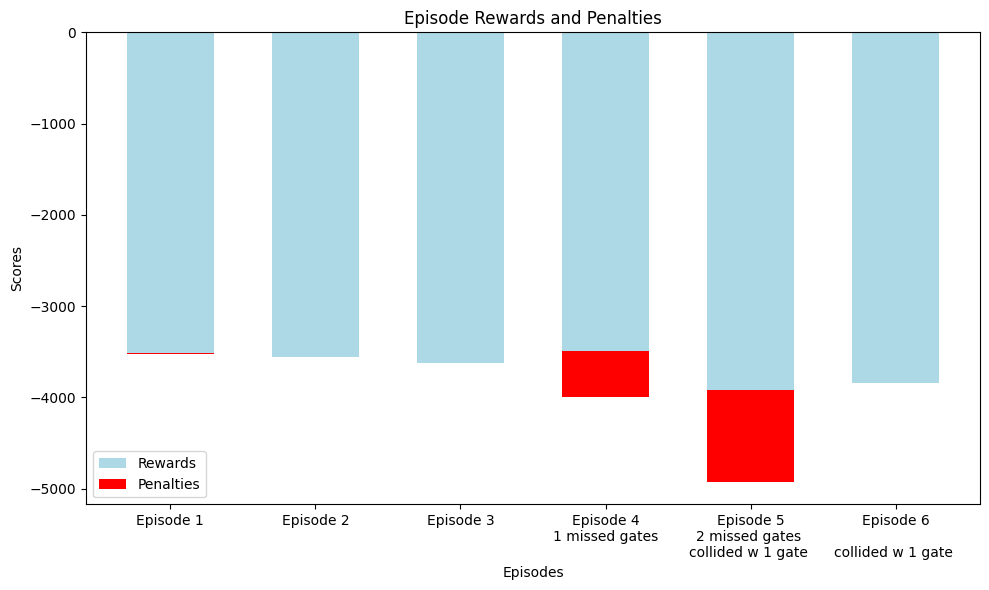

In [39]:
episodes = ['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4\n1 missed gates', 'Episode 5\n2 missed gates \ncollided w 1 gate ', 'Episode 6\n\ncollided w 1 gate ']

bar_width = 0.6
x = np.arange(len(episodes))

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, episodes_rewards, bar_width, label='Rewards', color='lightblue')

ax.bar(x, penalties, bar_width, bottom=episodes_rewards, label='Penalties', color='red')

# Add labels and title
ax.set_xlabel('Episodes')
ax.set_ylabel('Scores')
ax.set_title('Episode Rewards and Penalties')
ax.set_xticks(x)
ax.set_xticklabels(episodes)
ax.legend()

plt.tight_layout()
plt.show()


### **Conclusions**
Episodes 4 and 5 involve missed gates, resulting in a high penalty. Episodes 5 and 6 include collisions, and they also have the most actions/timesteps, as they require extra time for recovery.

- Each missed gate incurs a penalty of -500 to the reward.
- Collisions are not penalized but require time for the skier to recover and continue.
- Grey spots carry a very low penalty (-2) to encourage the skier to take the optimal path while minimizing the impact of minor deviations.